# Our learning algorithm

### Introduction

In the last lesson, we learned about our machine learning model of a regression line.  We saw how we can represent regression lines both in code and with a mathematical formula.  With simple linear regression, we know that our model takes the format of $/hat{y} = mx + b$ where $/hat{y}$ is the y value estimated by our line, $m$ is the slope of the line and $b$ is the $y$ intercept. 

We can use this formula to produce a line, and estimate an output for each provided input value, $x$.  In this lesson, we'll learn how to evaluate our line, with a cost function.

## Reviewing our cost function

Let's load up our data to then generate a scatter trace of our revenue data.

In [1]:
import json
with open('months-since-revenues.json', 'r') as revenue_file:
    monthly_revenues = json.load(revenue_file)

month_numbers = list(map(lambda monthly_revenue: monthly_revenue['month_number'], monthly_revenues))
revenues = list(map(lambda monthly_revenue: monthly_revenue['revenue'], monthly_revenues))

actual_trace = {'x': month_numbers, 'y': revenues, 'mode': 'markers', 'name': 'actual'}

Then we generate the regression model and plot create a trace for our model.

In [2]:
def y_hat(x):
    m = -1500
    b = 65000
    return m*x + b 

y_hats = list(map(y_hat,month_numbers))
regression_model = {'x': month_numbers, 'y': y_hats, 'mode': 'lines', 'name': 'estimated'}

Then, we calculate our errors and create traces for each of them.

In [3]:
from error import error_line_traces

actuals_and_expecteds = list(zip(revenues, y_hats))
errors = list(map(lambda actual_and_expected: actual_and_expected[0] - actual_and_expected[1], actuals_and_expecteds))
error_traces = error_line_traces(month_numbers, revenues, errors)

Finally, we plot all of our traces.

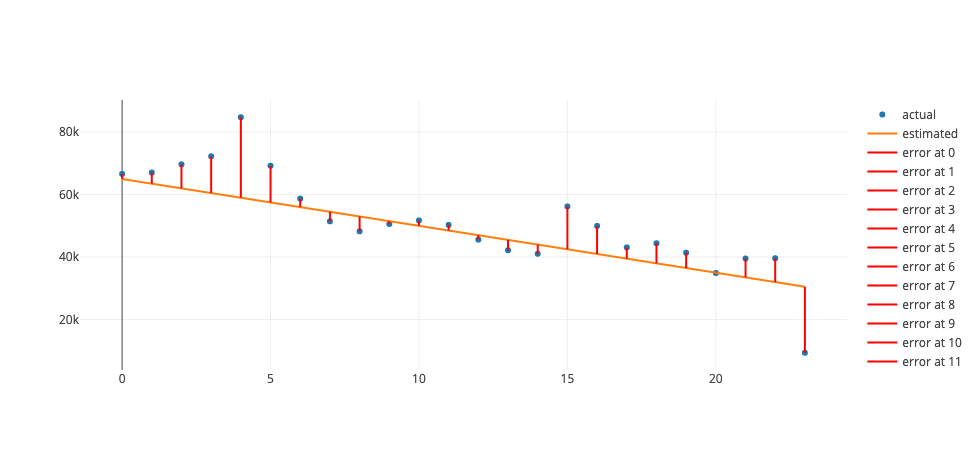

In [4]:
import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
iplot([actual_trace, regression_model] + error_traces)

Now remember that to calculate our cost function is our residual sum of squares.  And the formula for this is: 

$$RSS = (y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + ... (y_n - \hat{y}_n)^2$$

And we can calculate this in code, simply by squaring each of our errors, and then taking the sum.

In [5]:
squared_errors = list(map(lambda error: (error**2),errors))
sum(squared_errors)

1964179131

### Unpacking RSS

Now let's rewrite our RSS formula a little bit.  The current version hides a little bit.  We want to show exactly how our RSS formula depends on linear regression model.  Our formula for our regression model is: 

$$\hat{y} = mx + b$$

and so we can plug this into our RSS formula of 

$$RSS = (y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + ... (y_n - \hat{y}_n)^2$$

which can be rewritten as

$$RSS = (y_1 - (mx_1 + b) )^2 + (y_2 - (mx_2 + b) )^2 + ... (y_n - (mx_n + b))^2$$

In [6]:
month_numbers[0:3]

[0, 1, 2]

Let's just fill in the first couple of values into this formula to see how it works.  

$m = -1500$,
$b = 65000$ 

So then plugging this into our formula we have, 

$$ RSS = (y_1 - (-1500*x_1 + 65000))^2 + (y_1 - (-1500*x_2 + 65000))^2 ... (y_n - (-1500*x_n + 65000))^2$$

where our we plug in for $x_1$ and $y_1$ the coordinates of our first point $(0, 66609)$, and plug in our the coordinates of our second point $(1, 67048)$ for $x_2$ and $y_2$, and so on.

### Learning to decrease our cost

So in the above section, we saw that we can express our RSS formula as a function of $m$ and $b$ parameters of our simple linear regression model, as well as of the $x$ and $y$ coordinates of our dataset.  What's nice about this, is that while the x and y coordinates for a dataset are fixed, we can generate different RSS by changing our m and b parameters, that is the slope and y intercept of our linear regression model.  

Let's try this in code.

In [7]:
def error_from_parameters(m, b, x, y):
    y_hat = m*x + b 
    return y - y_hat

def rss(m, b, x_values, y_values):
    squared_errors = []
    pairs = list(zip(x_values, y_values))
    for pair in pairs:
        squared_error = error_from_parameters(m, b, pair[0], pair[1])**2
        squared_errors.append(squared_error)
    return sum(squared_errors)

In [8]:
m = -1500
b= 65000
rss(m, b, month_numbers, revenues)

1964179131

Now that we have written these functions, we can try out parameters for our function and see how it changes.

In [17]:
from graph import trace_values
actual_trace = trace_values(month_numbers, revenues)
left_traces = [actual_trace]
right_traces = []

In the code below change the values of m or b.  Then press shift + enter.  You'll notice the respective RSS values change to the right.  If you want to reset your graph, simply press shift + enter on the cell above.

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



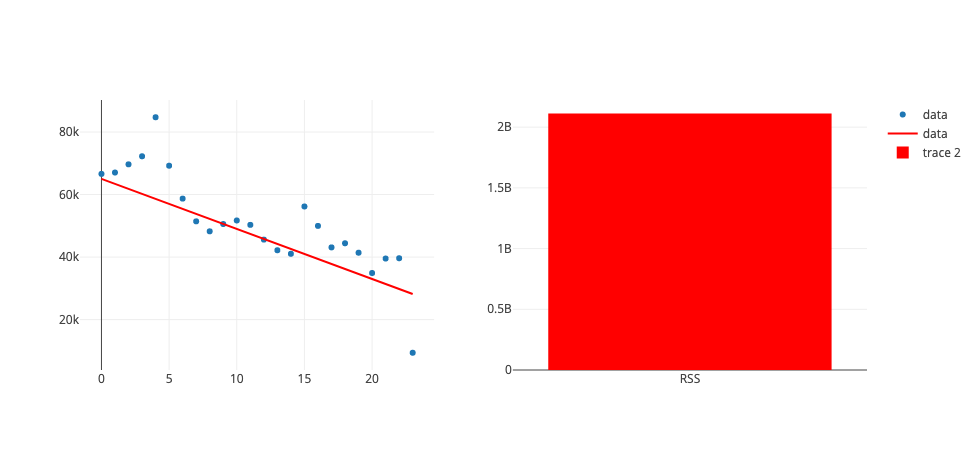

In [16]:
from graph import model_trace, trace_rss, pair_colors, plot_side_by_side

m = -1600
b= 65000

left_traces = left_traces +  [model_trace(m, b, month_numbers, revenues)]
right_traces = right_traces + [trace_rss(m, b, month_numbers, revenues)]
pair_colors(left_traces[1:], right_traces)

plot_side_by_side(left_traces, right_traces)

### Choosing our parameters with purpose

Ok, now that we have adjusted our parameters of m and b, and have seen how the graph changes, let's see if we can find a pattern to how our RSS changes.  If we can see a pattern in how our RSS changes, then we can figure out how to change our m and b parameters such that it minimizes our cost function.

Ok, so to start, let's plot incremental increases in our value of m.

In [27]:
b= 65000
m_values = list(range(-1700, -1000, 150))
m_values

[-1700, -1550, -1400, -1250, -1100]

Ok so we'll try plot our graphs and RSS values for each of these different m values.  Note that we'll keep b the same throughout.

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



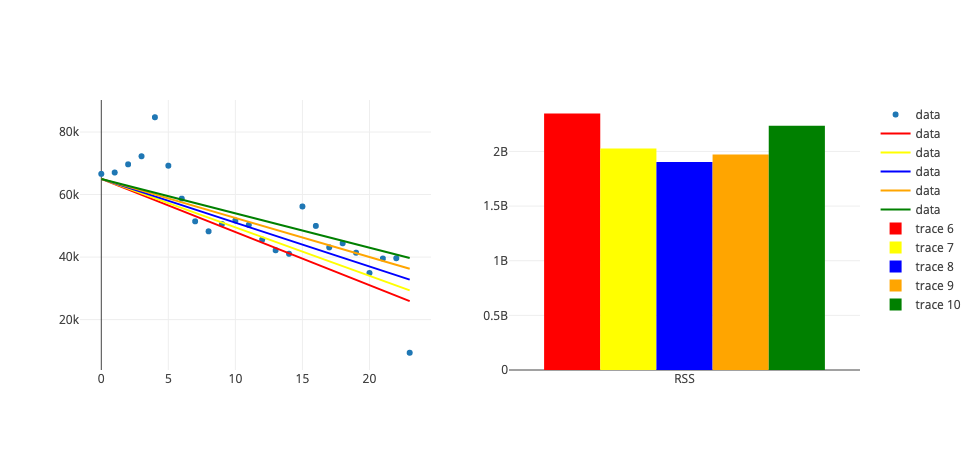

In [46]:


rss_traces = []
model_traces = []
for m in m_values:
    rss_trace = trace_rss(m, b, month_numbers, revenues)
    rss_traces.append(rss_trace)
    built_model_trace = model_trace(m, b, month_numbers, revenues)
    model_traces.append(built_model_trace)
    
pair_colors(model_traces, rss_traces)
plot_side_by_side([actual_trace] + model_traces, rss_traces)

The graph above is an important one.  What we can see is that as we increase our values of m from -1700 to -1100, starting with the red line, at first our RSS is relatively high.  Then it as we have our value of m approach zero, our RSS also gets smaller, up until the we draw our third line, with a value of m = -1400.  So we can see that our a chart of our RSS values forms a smiley face (called a parabola).

This will always be the case with whenever we incrementally change one of our parameters in linear regression - our RSS cost function will form a parabola.  

### Why this matters

This matters because computers are fairly good at finding the low point in a curve.  And that low point in our RSS curve depends on our value of m.  

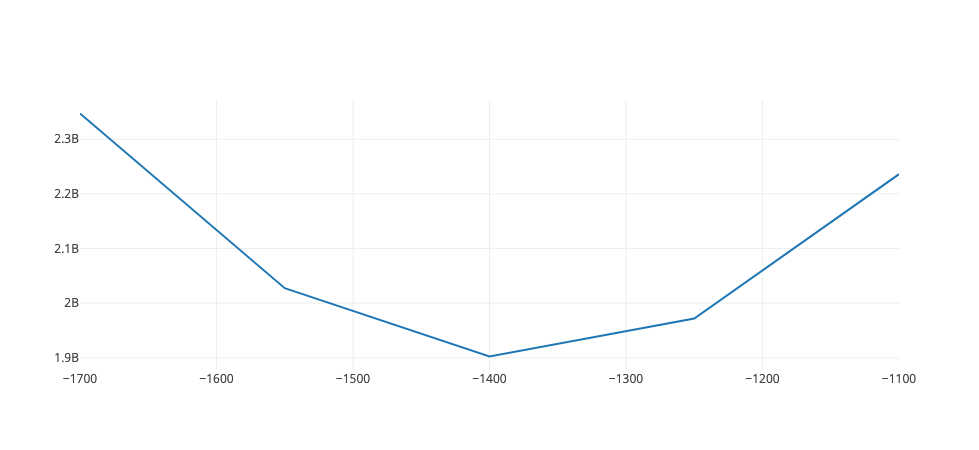

In [35]:
b= 65000
m_values = list(range(-1700, -1000, 150))

rss_values = list(map(lambda m: rss(m, b, month_numbers, revenues), m_values))

iplot([trace_values(m_values, rss_values, mode = 'lines')])

So if we find our value of m that minimizes our RSS, then we have a model that minimizes our error, and is thus more predictive.  And we don't have to do this by trying all of the different values of m.  Just from the picture above we can see that our numbers are only going to go up as we move m higher than -1100, and lower than -1700.

Computers are even better at finding this minimum value.

In [39]:
from scipy import optimize

def rss_value_vary_m(m):
    b= 65000
    return rss(m, b, month_numbers, revenues)

optimize.minimize(rss_value_vary_m, x0=-1700)

      fun: 1900450395.2278943
 hess_inv: array([[3.59616137e-05]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 5
     njev: 15
   status: 0
  success: True
        x: array([-1378.59792938])

In [40]:
def rss_value_vary_b(b):
    m = -1378
    return rss(m, b, month_numbers, revenues)

optimize.minimize(rss_value_vary_b, x0=-1700)

      fun: 1803967335.404646
 hess_inv: array([[0.06169075]])
      jac: array([16.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 276
      nit: 4
     njev: 88
   status: 2
  success: False
        x: array([67004.72240235])

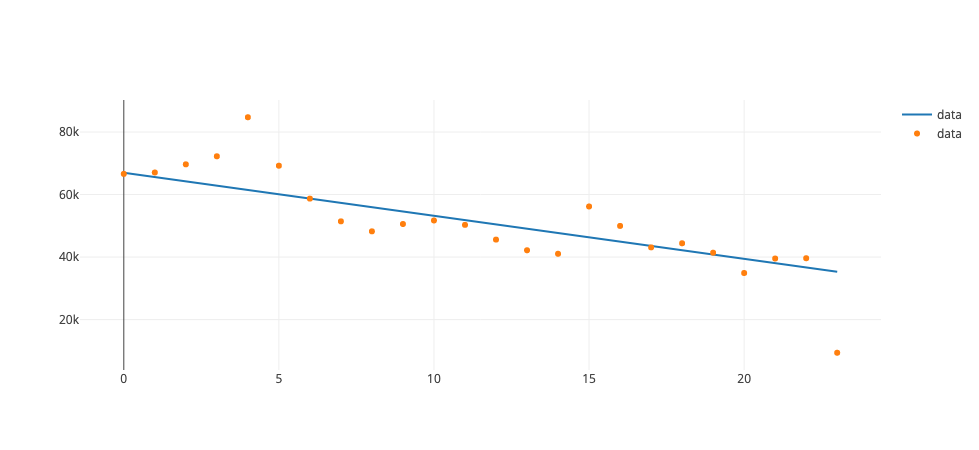

In [47]:
iplot([model_trace(-1378, 67004.7, month_numbers, revenues), actual_trace])

Looking at the m and b values produced by calling the `optimize` function above, we see that plotted a line that fits our data fairly well.

And comparing it's RSS against those of the previous RSS values we plotted.

In [49]:
b= 65000
m_values = list(range(-1700, -1000, 150))

list(map(lambda m_value: rss(m_value, 65000, month_numbers, revenues), m_values))

[2347115531, 2027483231, 1902430931, 1971958631, 2236066331]

Our new RSS value is lower that each of them.

In [51]:
m = -1378
b = 67004.7
rss(m, b, month_numbers, revenues)

1803967335.7599998

### Summary

In this lesson we saw how to use our RSS calculation to improve our line.

We can see something else as well.  Notice that the further away from the low point we are, the higher the slope of the parabola, and as we approach the minimum, that the slope flattens out.  We can use this fact to reach our minimum by trying out even fewer points.  We can simply pick a value of m like say -1600, determine the slope of the parabola at this point, and move far if the slope is steep and small if the slope is flat.  

Here, let's express this as a function, and then we'll plug in some numbers.

$ m_{new} = m_{old} - slopem_{old} * 10$ 